In [ ]:
!wget https://storage.googleapis.com/wandb_datasets/nature_12K.zip 
!unzip nature_12K.zip

In [ ]:
!pip install wandb torchmetrics torchvision pytorch-lightning

In [ ]:
!wandb online

In [ ]:
%env WANDB_API_KEY=77d02595152611dfbdff0cd06134f43db0cf56f3
# upload main.py, model_scratch, model_resnet_mod 
!python3 main.py

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

import wandb
import torch

# upload model_scratch file
from model_scratch import ScratchCNN

# loaded from wandb's best run
best_run = 'model-p4m8uhdu:v12'
config = {
    'dense': 64,
    'nf': 16,
    'optim': 'adam',
    'activation': 'mish',
    'org': 1,
    'batch_norm': True,
    'drop': 0.3,
    'filter': 2,
    'lr': 0.001,
    'model': 'scratch'
}

In [ ]:
# Downloading the model's checkpoint
run = wandb.init()
artifact = run.use_artifact('muttaborota/FundDL-AS2/' + best_run, type='model')
artifact_dir = artifact.download()
wandb.run.finish()

In [ ]:
# Loading the model
class Struct:
    def __init__(self, **entries):
        self.__dict__.update(entries)
s = Struct(**config)
model = ScratchCNN.load_from_checkpoint('./artifacts/' + best_run + '/model.ckpt', config=s, strict=False)

In [ ]:
# Making the test data ready
data_transform = transforms.Compose([
  transforms.RandomCrop(size=256, pad_if_needed=True),
  transforms.ToTensor()
])
testdata = ImageFolder(root='/content/inaturalist_12K/val', transform=data_transform)
testloader = DataLoader(testdata, 32)

model.eval()

In [ ]:
labels = testloader.dataset.classes
for i, batch in enumerate(testloader):
  x, y = batch
  y_hat = model(x)
  y_hat = torch.argmax(y_hat,axis=-1)
  break

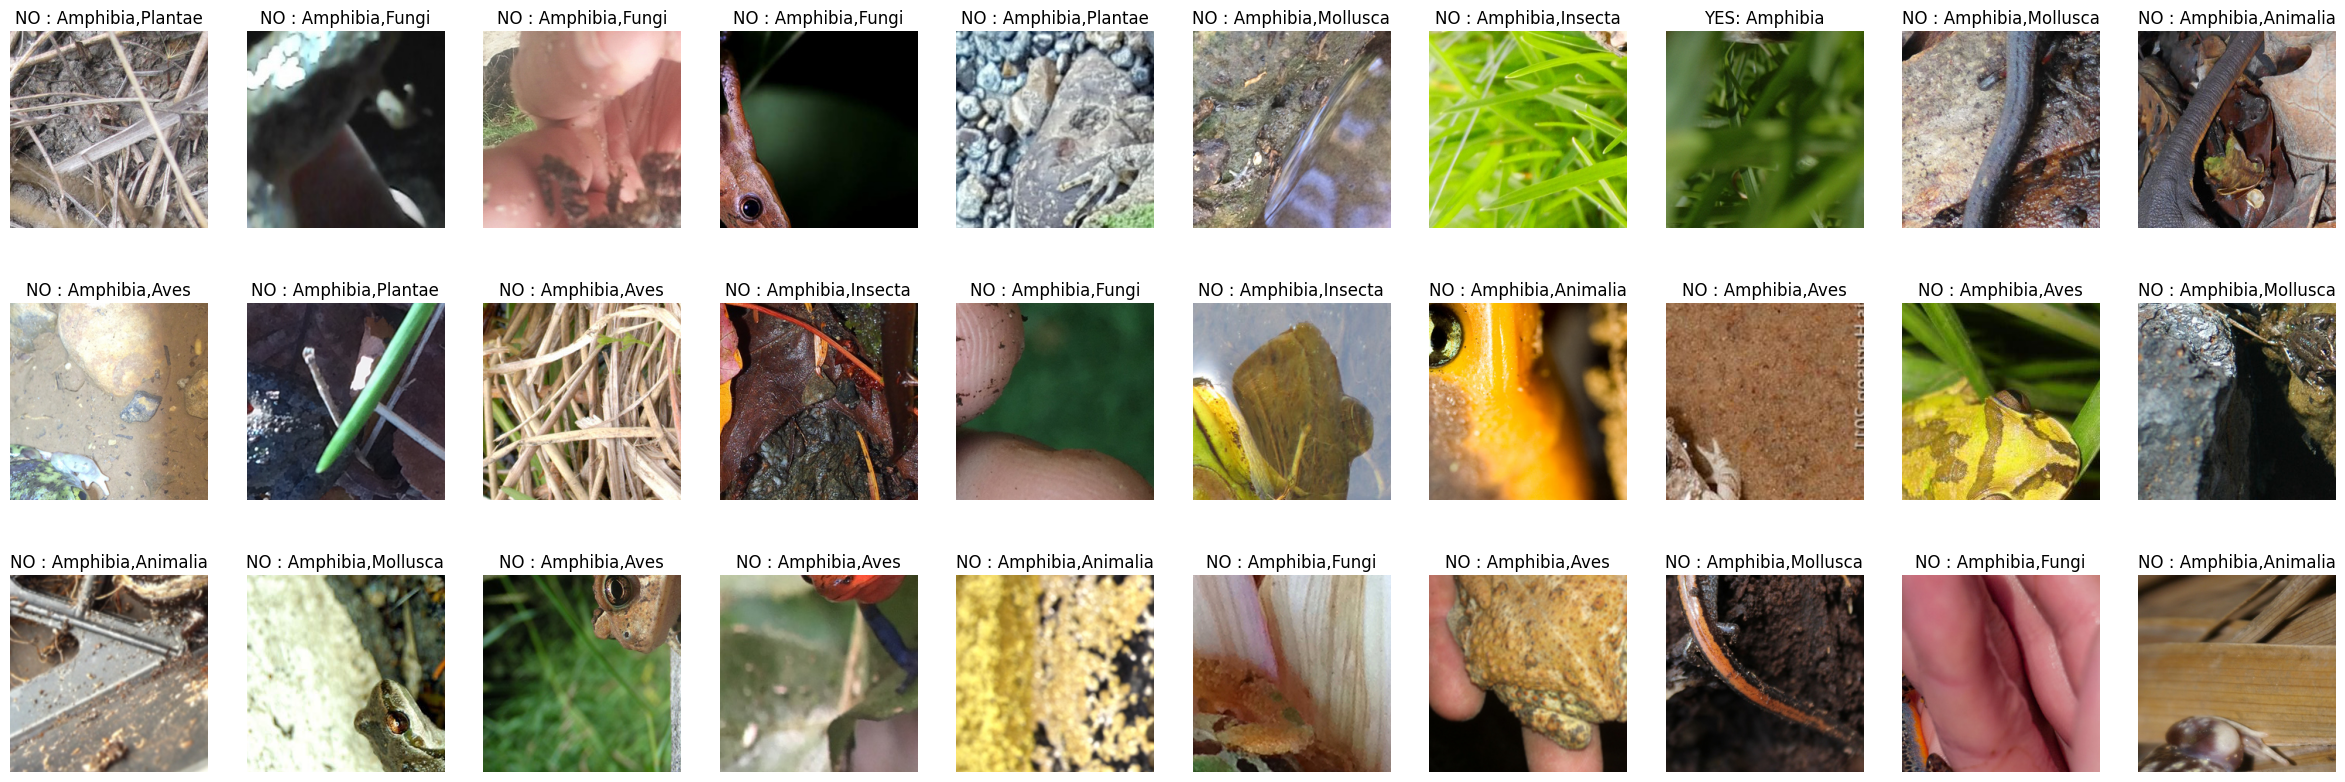

In [76]:
# Plotting
labels = testloader.dataset.classes
for i, (x, y) in enumerate(testloader):
  y_hat = model(x)
  y_hat = torch.argmax(y_hat,axis=-1)
  break

plt.figure(figsize=(30, 10))
for j, (x, y) in enumerate(testloader):
  for k in range(30):
    plt.subplot(3,10,k+1)

    if y_hat[k] == y[k]:
       plt.imshow(x[k].numpy().T)
       plt.title("YES: {}".format(labels[y[k]]))
    else:
       plt.imshow(x[k].numpy().T)
       plt.title("NO : {},{}".format(labels[y[k]], labels[y_hat[k]]))

    plt.axis('off')
  break